In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
import plotly.graph_objs as go
import numpy as np

In [96]:
df = pd.read_csv("/kaggle/input/dataset/Gia SMP va SMPcap 2021(Gi th trng SMP).csv", sep=";", encoding="ISO-8859-1")
df = df[["Ngày", "8"]]
df

,Ngày,8
0,01/01/2021,964.4
1,01/02/2021,1019.7
2,01/03/2021,988.4
3,01/04/2021,1002.0
4,01/05/2021,1061.5
...,...,...
360,27/12/2021,1002.0
361,28/12/2021,1002.0
362,29/12/2021,1061.5
363,30/12/2021,1022.6


# Mô hình LSTM

In [97]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('Ngày', inplace=True)
df

,8
Ngày,
2021-01-01,964.4
2021-01-02,964.4
2021-01-03,988.3
2021-01-04,988.4
2021-01-05,930.6
...,...
2021-12-27,1002.0
2021-12-28,1002.0
2021-12-29,1061.5


In [19]:
data = df.filter(['8'])
dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

329

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [21]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.11576934, 0.1971168 , 0.15107385, 0.17107973, 0.25860547,
       0.25860547, 0.25860547, 0.25860547, 0.26243013, 0.11915269,
       0.17107973, 0.26610768, 0.25860547, 0.25860547, 0.25860547,
       0.26610768, 0.15107385, 0.2534569 , 0.27022654, 0.27022654,
       0.27022654, 0.25860547, 0.1971168 , 0.15092674, 0.15107385,
       0.15107385, 0.11915269, 0.11459253, 0.08796705, 0.04839659])]
[0.11915269196822598]

[array([0.11576934, 0.1971168 , 0.15107385, 0.17107973, 0.25860547,
       0.25860547, 0.25860547, 0.25860547, 0.26243013, 0.11915269,
       0.17107973, 0.26610768, 0.25860547, 0.25860547, 0.25860547,
       0.26610768, 0.15107385, 0.2534569 , 0.27022654, 0.27022654,
       0.27022654, 0.25860547, 0.1971168 , 0.15092674, 0.15107385,
       0.15107385, 0.11915269, 0.11459253, 0.08796705, 0.04839659]), array([0.1971168 , 0.15107385, 0.17107973, 0.25860547, 0.25860547,
       0.25860547, 0.25860547, 0.26243013, 0.11915269, 0.17107973,
       0.26610768, 0.25860547, 0.

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-05-07 03:08:35.582047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 03:08:35.582232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 03:08:35.754832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


299/299 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0215


In [25]:

#training_data_len = 1860, co tat ca 2300 diem du lieu
# test data lay tu 1800 den 2299
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
# lay ket qua da du doan
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models =
# danh gia mo hinh
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE:  37.99037659444574


/tmp/ipykernel_33/1416944420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


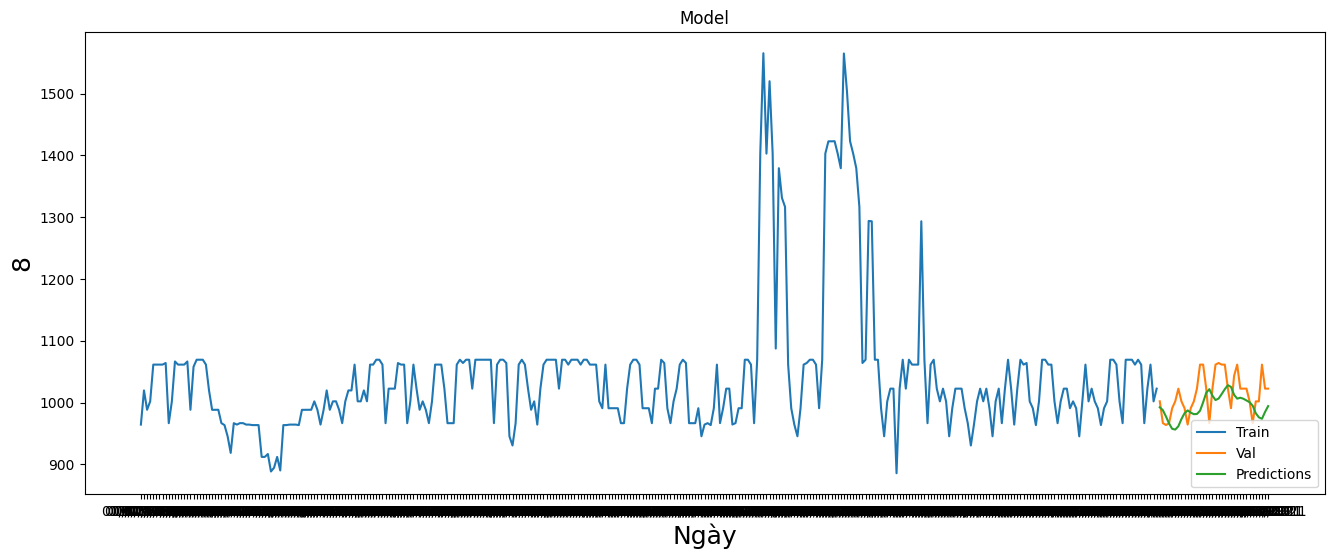

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('8', fontsize=18)
plt.plot(train['8'])
plt.plot(valid[['8', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# MÔ hình Gausian

In [30]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [98]:
feats= ['8']

In [31]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X=transformer.fit_transform(np.array(df[['8']]).reshape(-1,1))

In [32]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [33]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=['8'])
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [39]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

    model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

    model_list.append(model)

[200]	valid_0's multi_logloss: 0.000151726
[400]	valid_0's multi_logloss: 0.000151726
[200]	valid_0's multi_logloss: 0.000153686
[400]	valid_0's multi_logloss: 0.000153686
[200]	valid_0's multi_logloss: 0.000154034
[400]	valid_0's multi_logloss: 0.000154034
[200]	valid_0's multi_logloss: 0.000156754
[400]	valid_0's multi_logloss: 0.000156754
[200]	valid_0's multi_logloss: 0.000153261
[400]	valid_0's multi_logloss: 0.000153261
[200]	valid_0's multi_logloss: 0.00015524
[400]	valid_0's multi_logloss: 0.00015524
[200]	valid_0's multi_logloss: 0.000155472
[400]	valid_0's multi_logloss: 0.000155472
[200]	valid_0's multi_logloss: 9.92419e-06
[400]	valid_0's multi_logloss: 9.8222e-06
[600]	valid_0's multi_logloss: 9.75475e-06
[800]	valid_0's multi_logloss: 9.70667e-06
[1000]	valid_0's multi_logloss: 9.67072e-06
[1200]	valid_0's multi_logloss: 9.64285e-06
[1400]	valid_0's multi_logloss: 9.62062e-06
[1600]	valid_0's multi_logloss: 9.60248e-06
[1800]	valid_0's multi_logloss: 9.5874e-06
[2000]	val

In [40]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [41]:
labels=np.argmax(lgb_preds,axis=1)

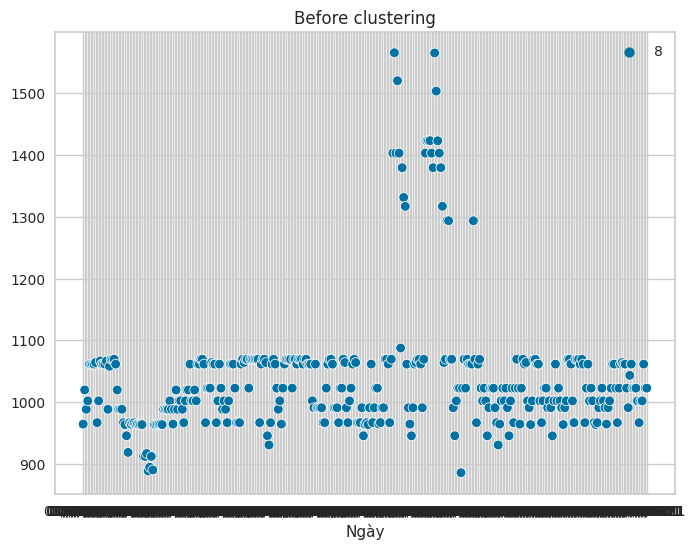

In [42]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(label="bla")
sns.scatterplot(df[feats], marker='o');
ax.set_title("Before clustering");

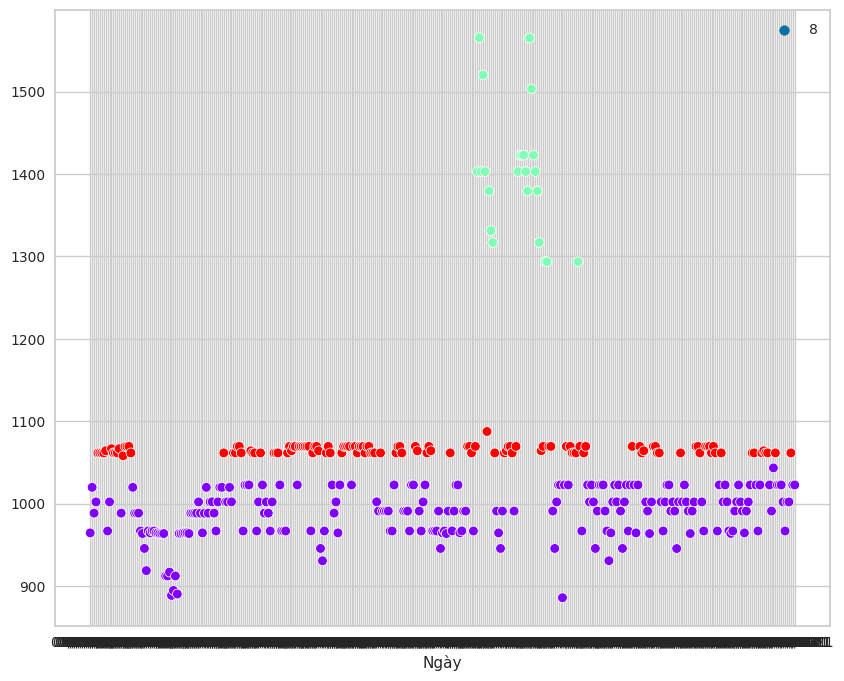

In [43]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(df[feats], c=df["Clusters"], marker='o',cmap="rainbow");
ax.set_title("After Clustering");

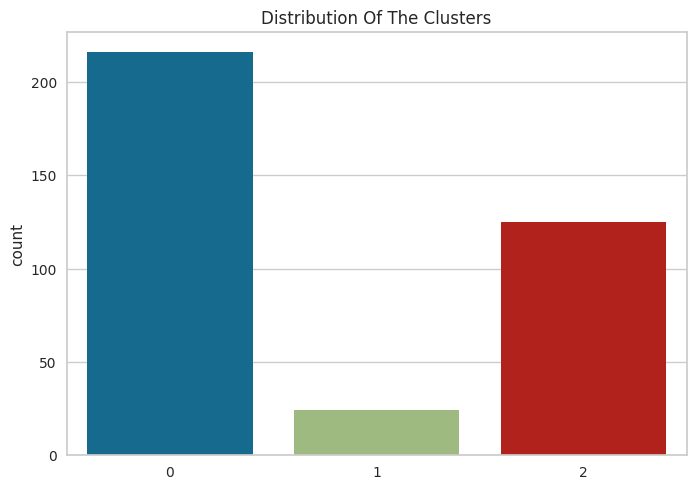

In [44]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Distribution Of The Clusters")
plt.show()

# Mô hình SVM

In [99]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [100]:
forecast_days = 15
df = df[feats]
df['Prediction'] = df[feats].shift(-forecast_days)

In [101]:
X = np.array(df.drop(['Prediction'], axis=1))
X = X[:-forecast_days]
y = np.array(df['Prediction'])
y = y[:-forecast_days]

In [102]:
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [103]:
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

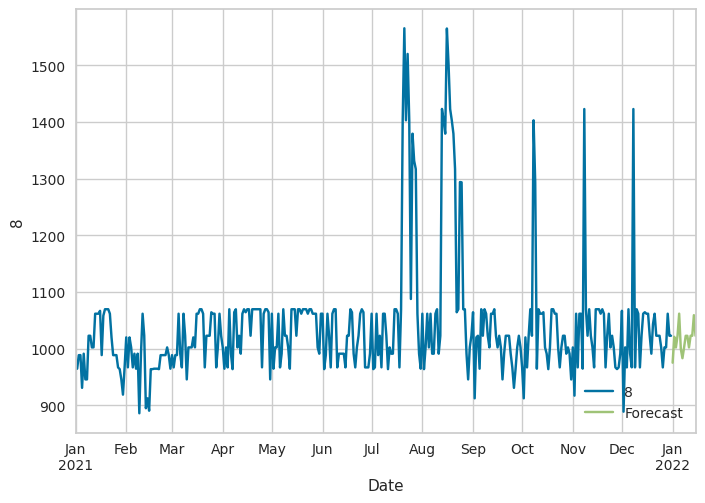

In [104]:
forecast_set = model.predict(X[-forecast_days:])
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = pd.Timestamp(next_unix, unit='s')
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
df[feats].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('8')
plt.show()